# Neural Networks

Why do we need another learning algorithm?

If we have data which is nonlinear separable we need to define the features for our Logistic Regression algorithm such that we include enough polynomial terms. The more features that we have, the more complex would to build the polynomial terms. It also brings the risk of overfitting and becoming computationally expensive.

One example, where our feature vector is very large is Image Classification: For a 50x50 pixel image, we have 2500 features on a grey scale image and 7500 on an RBG image. If we introduce nonlinear feature combination, we would have more than 3 million features which would be too big to compute.

What if we could have an algorithm which automatically finds the relevant features for us? 

Neural Networks can do that. They are very good for training sets with large features. 

### What is a Neutal Networks:
Neural Networks try to mimic the human brain. More specifically, they simulate the neurons in the brain. 
The parts of the Neuron that we want to focus on the **Dendrites**, the **cell body** and the **Axon**. The Dendrites are connected to other neurons and "receive input". We think of them as input wires. The **cell body** performs some calculation and passes some output to the Axon. The Axon acts like an output wire which passes results to the Dendrites of other Neurons. 

On a simplistic view, a neuron is a computational unit which gets a number of inputs, does some computation and sends the output to other neurons. The communication between the neurons are performed through a pulse of electricity which can vary by strength. 

![Human Neuron](../data/week3/Neuron.png)

From a computational perspective, we can look at one neuron as a Logistic unit which takes a few inputs via the input wires, does some computation and returns some output. The computation (as given by the name) is logistic (i.e. $y = h_\theta(x) = \frac{1}{1+e^-\theta^Tx}$). The parameters $\theta$ are often also referred as weights.

![Human Neuron](../data/week3/Artificial_Neuron.png)

### Neural Network

If we connect multiple neurons, we obtain a Neural Network. A Neural Network consists of the **Input layer** which takes input values and passes them on to our neurons in the **hidden layer**. The combined output of the final hidden layer is the **output layer**. Note that we are not restricted to a single hidden layer or a single output neuron. 

Additionally, we can see that we add a bias unit which always outputs 1 to every layer. Since the figure below has only exactly one hidden layer, we have an **Autoencoder** which we can use to effectively learn feature compression. 

![Human Neuron](../data/week3/Neural_Network.png)

#### Notation
- $a^{(j)}_i$ = "activation" of unit $i$ in layer $j$
- $\Theta^{(j)}$ = matrix of weights controlling function mapping from layer $j$ to layer $j+1$

Let's do a sample calculation of the output for the network below:
![Human Neuron](../data/week3/Neural_Network1.png)

\begin{align}
&a_1^{(2)} = g(\Theta^{(1)}_{10}x_0 + \Theta^{(1)}_{11}x_1 + \Theta^{(1)}_{12}x_2 + \Theta^{(1)}_{13}x_3)\\
&a_2^{(2)} = g(\Theta^{(1)}_{20}x_0 + \Theta^{(1)}_{21}x_1 + \Theta^{(1)}_{22}x_2 + \Theta^{(1)}_{23}x_3)\\
&a_3^{(2)} = g(\Theta^{(1)}_{30}x_0 + \Theta^{(1)}_{31}x_1 + \Theta^{(1)}_{32}x_2 + \Theta^{(1)}_{33}x_3)\\
h_\Theta(x) = &a_1^{(3)} = g(\Theta^{(2)}_{10}a^{(2)}_0 + \Theta^{(2)}_{11}a^{(2)}_1 + \Theta^{(2)}_{12}a^{(2)}_2 + \Theta^{(2)}_{13}a^{(2)}_3)\\
\end{align}

We can perform this computation more efficiently in a vectorized fashion.
We define:

\begin{align}
z_1^{(2)} = \Theta^{(1)}_{10}x_0 + \Theta^{(1)}_{11}x_1 + \Theta^{(1)}_{12}x_2 + \Theta^{(1)}_{13}x_3\\
z_2^{(2)} = \Theta^{(1)}_{20}x_0 + \Theta^{(1)}_{21}x_1 + \Theta^{(1)}_{22}x_2 + \Theta^{(1)}_{23}x_3\\
z_3^{(2)} = \Theta^{(1)}_{30}x_0 + \Theta^{(1)}_{31}x_1 + \Theta^{(1)}_{32}x_2 + \Theta^{(1)}_{33}x_3\\
\end{align}

and therefore, 
\begin{align}
a_1^{(2)} = g(z_1^{(2)})\\
a_2^{(2)} = g(z_2^{(2)})\\
a_3^{(2)} = g(z_3^{(2)})\\
\end{align}

We can define the vectors:

\begin{align}
  x = 
  \begin{bmatrix}
    x_{0}\\
    x_{1}\\
    x_{2}\\
    x_{3}\\
  \end{bmatrix}
  \quad\quad\quad
  z^{(2)} = 
  \begin{bmatrix}
  z^{(2)}_1\\  
  z^{(2)}_2\\  
  z^{(2)}_3\\  
  \end{bmatrix}
\end{align}


\begin{align}
z^{(2)} = \Theta^{(1)}x\\
a^{(2)} = g(z^{(2)})
\end{align}

Further, we will define $a^{(1)} = x$ such that we can write: $z^{(2)} = \Theta^{(1)}a^{(1)}$

Lastly, we add $a_0^{(2)} = 1$ to $z^{(2)}$ to add the bias value.

\begin{align}
z^{(3)} = \Theta^{(1)}a^{(2)}\\
h_\Theta(x) = g(z^{(3)})
\end{align}

This whole process of calculating the hypothesis is called **forward propagation**. 

## Example 1 - XNOR

Consider the problem where $x_1, x_2$ are binary (0 or 1) and $y = \neg(x_1 \bigoplus x_2)$. This gives us the following four points.
If we add some noise to the datapoints, we would have a non-linear classification problem which is hard to solve with logistic regression.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import inv

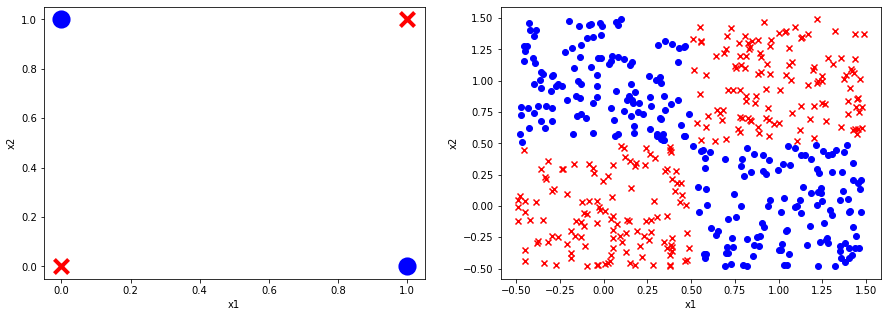

In [2]:
x1 = [0, 1, 0, 1]
x2 = [0, 1, 1, 0]

fig, (ax4, axn) = plt.subplots(1, 2, figsize=(15,5))
ax4.scatter(x1[0:2], x2[0:2], s=200, marker='x', color='r', linewidth=4)
ax4.scatter(x1[2:4], x2[2:4], s=200, marker='o', color='b', linewidth=4)
ax4.set_xlabel('x1')
ax4.set_ylabel('x2')

salt = 0.49
n = 500
quaterN = (int)(n/4)
x1n = np.array([np.zeros(quaterN), np.ones(quaterN), np.zeros(quaterN), np.ones(quaterN)])
x1n = x1n.flatten() + np.random.uniform(low=-salt, high=salt, size=(4*quaterN,))

x2n = np.array([np.zeros(quaterN), np.ones(quaterN), np.ones(quaterN), np.zeros(quaterN)])
x2n = x2n.flatten() + np.random.uniform(low=-salt, high=salt, size=(4*quaterN,))

axn.scatter(x1n[0:2*quaterN], x2n[0:2*quaterN], marker='x', color='r')
axn.scatter(x1n[2*quaterN+1:-1], x2n[2*quaterN+1:-1], marker='o', color='b')
axn.set_xlabel('x1')
axn.set_ylabel('x2')
plt.show()

We can represent an XNOR with simple logic as $y = x_1 \land x_2 \lor \neg x_1 \land \neg x_2$ which is mathematically equivalent to $y = x_1*x_2 + (1-x_1)*(1-x_2)$.

In oder to understand how a Neural Network may come up with this representation, we first need to understand how an **and gate** can work with a single neuron. The input layer contains $x_1$ and $x_2$ and the bias value. Recall that we the orange neuron will map the weighted input in the range (0,1) with the Sigmoid function where we define $y=0$, if $g(z)<0.5$ and $y=1$ if $g(z)>0.5$. I.e. $y=1$, if $z>0.5$ and $y=0$, if $z<0.5$.

If we choose weights $\theta = [-3, 2, 2]$, we can see that $h\Theta(x) = \Theta^{(1)}_{10}x_0 + \Theta^{(1)}_{11}x_1 + \Theta^{(1)}_{12}x_2 + \Theta^{(1)}_{13}x_3$ ($x_0=1$ because it is the bias) takes the following values for the different options:

| $x_1$ | $x_2$ | $g(z)$ | $h_\theta(x)$|
|:---:|:---:|:---:|:---:| 
|0    | 0   |-3|0|
|0    | 1   |-1|0|
|1    | 0   |-1|0|
|1    | 1   |1|1|

![NeuronAnd](../data/week3/AndANN.jpg)

Likewise we can use an **or gate** with a single neuron, where the hypothesis is: $g(-10 + 20x_1 + 20x_2)$
![NeuronAnd](../data/week3/OrANN.png)

Finally, to fully represent the XNOR, we also need to know how to build a **not gate** with a neuron:

![NeuronAnd](../data/week3/NotANN.jpg)

With these components in place, we can build the **XNOR**.

The green arrows are the and gate ($x_1 \land x_2$)

The blue arrows are the not $x_1$ and not $x_2$ ($\neg x_1 \land \neg x_2$)

The red arrows combine the two results in an or ($a^{(2)}_1 \lor a^{(2)}_2$)

| $x_1$ | $x_2$ | $a^{(2)}_1$ |$a^{(2)}_2$| $a^{(3)}_1$|
|:---:|:---:|:---:|:---:|:---:| 
|0    | 0   |0|1|1|
|0    | 1   |0|0|0|
|1    | 0   |0|0|0|
|1    | 1   |1|0|1|

![NeuronAnd](../data/week3/XNOR.png)


## Multiclass prediction

Multiclass prediction is basically the same. We build a network with n output units. Each of the output units will return a value/certainty and we can simply take the maximum value. 
![NeuronAnd](../data/week3/Multiclass.png)

## Learning with Neural Networks - Backpropagation

<!-- Maybe Gradient vanishing different node architectures LSTM GRU, etc.-->
To train the neural networks, we will use a generalization of the cost function of the Logistic Regression cost function.

**Logistic Regression**:

\begin{align}
J(\theta) = -\frac{1}{m} \left[ \sum_{i=1}^m y^{(i)} log \; h_\theta (x^{(i)}) + (1-y^{(i)}) \; log \; (1-h_\theta (x^{(i)})) \right] + \underbrace{\frac{\lambda}{2m}\sum^n_{j=1}\theta^2_j}_\text{Regularization}
\end{align}

**Neural Network** (with K outputs and L layers and $s_l$ units in layer $l$): 
\begin{align}
h_\theta(x) \in \mathbb{R}^K \quad (h_\Theta(x))_i=i^{th} \text{ output}
\end{align}

\begin{align}
J(\theta) = -\frac{1}{m} \left[ \sum_{i=1}^m \sum_{k=1}^K y_k^{(i)} log \; h_\Theta (x^{(i)})_k + (1-y_k^{(i)}) \; log \; (1-h_\Theta (x^{(i)}))_k \right] + \underbrace{\frac{\lambda}{2m}\sum^{L-1}_{l=1}\sum^{s_l}_{i=1}\sum^{s_{l+1}}_{j=1}(\Theta^{(l)}_{ji})^2}_\text{Regularization}
\end{align}

In order to minimize the cost function $J(\Theta)$ (e.g. via gradient descent), we need to compute 
- $J(\Theta)$
- $\frac{\partial}{\partial \Theta^{(l)}_{ij}} J(\Theta)$

Consider the multi class network above.
Given a single training example $(x,y)$, we first apply forward propagation to compute the prediction of the network:

\begin{align}
a^{(1)} &= x\\
z^{(2)} &= \Theta^{(1)}a^{(1)}\\
a^{(2)} &= g(z^{(2)} (and bias a_0^{(2)})\\
z^{(3)} &= \Theta^{(2)}a^{(2)}\\
a^{(3)} &= g(z^{(3)} (and bias a_0^{(3)})\\
z^{(4)} &= \Theta^{(3)}a^{(3)}\\
a^{(4)} &= h_\Theta(x) = g(z^{(4)}\\
\end{align}

In order to compute the derivatives, we will use **backpropagation**:\
Intuition: $\delta^{(l)}_j = $ "error" of node $j$ in layer $l$.

For each output unit (layer L=4) we compute $\delta^{(4)}_j = a^{(4)}_j -y_j$\
Vectorized, we can write $\delta^{(4)} = a^{(4)} - y$

We then compute the error terms for the other layers:\
$\delta^{(3)} = (\Theta^{(3)})^T\delta^{(4)} .\times g'(z^{(3)}) \quad = \quad (\Theta^{(3)})^T\delta^{(4)} .\times a^{(3)} . \times (1-a^{(3)})$\
$\delta^{(2)} = (\Theta^{(2)})^T\delta^{(3)} .\times g'(z^{(2)}) \quad = \quad (\Theta^{(2)})^T\delta^{(3)} .\times a^{(2)} . \times (1-a^{(2)})$

**Generalized we have**\
$\delta^{(i)} = (\Theta^{(i)})^T\delta^{(i+1)} .\times a^{(i)} . \times (1-a^{(i)})$

If we ignore regularization, the derivation of $J(\Theta)$ is:
$\frac{\partial}{\partial \Theta^{(l)}_{ij}} J(\Theta) = a_j^{(l)} \delta^{(l+1)}_i$

Suppose we have a training set of multiple samples: $\{(x^{(1)}, y^{(1)}), \dots, (x^{(m)}, y^{(m)})\}$

Set $\Delta_{ij}^{(l)} = 0$ for all $i,j,l$


For $i=1$ to $m$:\
$\quad$  Set $a^{(1)} = x^{(i)}$\
$\quad$  Perform forward propagation to compute $a^{(1)}$ for $l = 2,3,\dots,L$\
$\quad$  Using $y^{(i)}$, compute $\delta^{(L)} = a^{(L)} - y^{(i)}$\
$\quad$  Compute $\delta^{(L-1)}, \delta^{(L-2)}, \dots, \delta^{(2)}$\
$\quad$  $\Delta^{(l)}_{ij} :=  \Delta^{(l)}_{ij} + a^{(l)}_j\delta^{(l+1)}_{i} \quad = \quad \Delta^{(l)} :=  \Delta^{(l)} + \delta^{(l+1)}(a^{(l)})^T$

$D^{(l)}_{i,j} := \frac{1}{m}\left(\Delta^{(l)}_{i,j} + \lambda\Theta^{(l)}_{i,j}\right)$   If $j = 1$\
$D^{(l)}_{i,j} := \frac{1}{m}\Delta^{(l)}_{i,j} \quad\quad\quad\quad$ If $j = 0$

Finally, we get: 
$\frac{\partial}{\partial\Theta^{(l)}_{ij}}J(\Theta) = D_{ij}^{(l)}$

### Gradient checking

When implementing Backpropagation, that we can have suttle bugs in our code. Even with bugs it is possible that our cost function is decreasing with every iteration and that the network is performing seemingly well on the task. Through Gradient checking, we can validate that we don't have any of these bugs in our code. 

We can numerically estimate the gradient of our cost function $J$ at $\Theta \in \mathbb{R}$ by calculating $J(\Theta - \epsilon)$ and $J(\Theta + \epsilon)$. If we connect these points and with an $\epsilon$ that is sufficiently small (e.g. $10^{-4}$) we can estimate the derivative through:

\begin{align}
\frac{\partial}{\partial\Theta} \approx \frac{J(\Theta + \epsilon)- J(\Theta - \epsilon)}{2\epsilon}
\end{align}

Using this gradient approximation, we can compare it to the one that we computed gradient from backpropagation for each partial derivative:

\begin{align}
\frac{\partial}{\partial\Theta} &\approx \frac{J(\Theta_1 + \epsilon, \Theta_2, \dots, \Theta_n)- J(\Theta - \epsilon,\Theta_2, \dots, \Theta_n)}{2\epsilon}\\
\frac{\partial}{\partial\Theta} &\approx \frac{J(\Theta_1, \Theta_2  + \epsilon, \dots, \Theta_n)- J(\Theta,\Theta_2 - \epsilon, \dots, \Theta_n)}{2\epsilon}\\
&\vdots
\end{align}

**Ensure to turn off the gradient approximation when you train the neural network. Otherwise it will run very slow!**

### Random initialization

We need to initialize our $\Theta$ to some values. For logistic regression, it is feasible to initialize all parameters as 0. However, this does not work for gradient descent as all weights are update exactly the same and thus all $\delta^{(l)}_i$ in a layer will be the same. Consequently, all partial derivatives will be the same and the updated values will remain the same. The property of $a_1^{(2)} = a^{(2)}_2$ will remain the same throughout the whole training process. 

We can avoid this by breaking the symmetry in the weights, i.e. initializing the weights to random parameters. 

### Putting it all together

**Pick a network architecture**
- Number of input units: Dimension of feature vector $x^{(i)}$
- Number of output units: Number of classes to predict
- Reasonable default is a single hidden layer (Autoencoder). Having the same number of hidden units in every layer (usually more hidden units is better but comes at a computational cost)

**Training a neural network**
1. Randomly initialize the weights
2. Implement forward propagation to get $h_\theta(x^{(i)})$ for any $x^{(i)}$
3. Implement the cost function $J(\Theta)$
4. Implement backpropagation to compute the partial derivatives $\frac{\partial}{\partial\Theta^{(l)}_{jk}}J(\Theta)$
5. Use gradient checking to compare $\frac{\partial}{\partial\Theta^{(l)}_{jk}}J(\Theta)$ from the backpropagation with the numerical estimate of $J(\Theta)$ (Then disable gradient checking)
6. Use gradient descent or advanceds optimization methods with backpropagation to try to minimize $J(\Theta)$ as a function of parameters $\Theta$.

```
for i = 1:m,
   Perform forward propagation and backpropagation using example (x(i),y(i))
   (Get activations a(l) and delta terms d(l) for l = 2,...,L
```

In theory, these algorithms can get stuck in a local optimum. However, this is often not the case in the real world.


### Autoencoders

Before we implement our first neural network, we will implement a simplified version of a neural network. The autoencoder is a neural network with one hidden layer which can be used generate feature encodings in an unsupervised fashion which is trained through backpropagation. 

The architecture of an autoencoder is as seen in the Figure below: 
- One input layer
- One hidden layer
- One output layer

The special property of an autoencoder is that the goal is to achieve $h_\theta(x)\sim x$. I.e. the output should be the same as the input. Typically, the hidden layer has less neurons and thus forces the autoencoder to find a more compact representation of the input which can be reconstructed into the original input. Consequently, the Autoencoder consists of two parts, an encoding part which are the weights between the input layer and the hidden layer and a decoding part which are the weights between the hidden layer and the output layer. 

![NeuronAnd](../data/week3/autoencoder_architecture.png)

**Example**
While Autoencoders can be used to detect features in images, we will used decimal to binary encodings as a running example. We will transform numbers between 0-7 to a binary representation. Our input will be a vector of length 8 in the form $(0,\dots, 1, \dots, 0)$. Thus, our input (and output) layer has 8 neurons. In order to represent 7 as a binary number, we need 3 places (111). Consequently, we can use three neurons in out hidden layer which will be the binary encoding. 

A full transformation map between decimal, input vector and binary can be seen below:

| Decimal | Input       | Binary |
|:--:|:--:|:--:|
| 0       | 0000 0001   | 000    |
| 1       | 0000 0010   | 001    |
| 2       | 0000 0100   | 010    |
| 3       | 0000 1000   | 011    |
| 4       | 0001 0000   | 100    |
| 5       | 0010 0000   | 101    |
| 6       | 0100 0000   | 110    |
| 7       | 1000 0000   | 111    |

Through backpropagation we can learn the respective weights to encode and decode the input as binary.\
Note that in this example, we do not neccessarily need a bias node 

The code below does not reflect the Backpropagation definition above. I did not manage to implement a working autoencoder with the given formulas. The one below works (I am not 100% sure where I got the formulas from but it is from the course ACML from my uni). A few things that suprise me is the lack of a learning rate and the way how the gradients/partial derivatives are computed. Either way, it is unlikely that I will have to implement backpropagation from scratch and thus, this example is sufficient.

In [27]:
import numpy as np

def sigmoid(x):
    return 1.0/(1+ np.exp(-x))

def sigmoid_derivative(x):
    return x * (1.0 - x)

class NeuralNetwork:
    def __init__(self, x, y):
        self.input      = x
        self.weights1   = np.random.rand(self.input.shape[1],3) 
        self.weights2   = np.random.rand(4,8)
        self.y          = y
        self.output     = np.zeros(self.y.shape)

    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
        self.biaslayer1 = np.c_[self.layer1, np.ones([8])] 
        self.output = sigmoid(np.dot(self.biaslayer1 , self.weights2))

    def backprop(self):
        # application of the chain rule to find derivative of the loss function with respect to weights2 and weights1
        d_weights2 = np.dot(self.layer1.T, (2*(self.y - self.output) * sigmoid_derivative(self.output)))
        d_weights1 = np.dot(self.input.T,  (np.dot(2*(self.y - self.output) * sigmoid_derivative(self.output), self.weights2.T) * sigmoid_derivative(self.biaslayer1)))

        # update the weights with the derivative (slope) of the loss function
        self.weights1 += d_weights1[:,:-1]
        self.weights2 += np.vstack([d_weights2, np.zeros(8)])

def equal_matrix(A,B):
    for i in range(len(A)):
        for j in range(len(A[0])):
            if (A[i][j] != B[i][j]):
                return False
    return True

X = np.identity(8)
total_itr = 0
min_itr = 100000000000000
max_itr = 0
num = 50
for x in range(0, 1):
    nn = NeuralNetwork(X,X)
    iterations = 0
    while not equal_matrix(np.rint(nn.output), X):
        iterations += 1
        nn.feedforward()
        nn.backprop()
    total_itr += iterations
    min_itr = min(min_itr, iterations)
    max_itr = max(max_itr, iterations)
total_itr = total_itr/num
print("Converge after {} iterations, min {}, max {}".format(total_itr, min_itr, max_itr))    
print(np.rint(nn.weights1))
print(np.rint(nn.weights2))   

Converge after 64.68 iterations, min 3234, max 3234
[[ 5. -2. -1.]
 [-2.  6. -1.]
 [-2. -2. -2.]
 [ 6.  0. -4.]
 [ 4. -6.  6.]
 [ 1.  6. -6.]
 [-1. -1.  6.]
 [-6.  4.  6.]]
[[  7. -20.  -2.   8.  -2.  -6. -15. -27.]
 [-17.  10.  -2.  -9. -28.   6. -16.  -1.]
 [-10. -14.  -2. -27.   4. -27.  11.   4.]
 [  0.   0.   1.   1.   1.   1.   0.   0.]]


If we investigate the bias layer for all possible inputs, we can see that the Autoencoder manages to learn the binary representation of the eight inputs. 

In [33]:
np.round(nn.biaslayer1[:,:-1])

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 0.],
       [1., 1., 0.],
       [1., 0., 1.],
       [1., 1., 0.],
       [0., 0., 1.],
       [0., 1., 1.]])

**Broken attempt for vector form of an autoencoder**

In [34]:
import random

import numpy as np

#random.seed(123)
np.set_printoptions(precision=3)

# Input vector
inputs = np.eye(8)

# Simple sigmoid function that returns the sigmoid value for a given vector
def activation_function(x):
    return 1/(1 + np.exp(-x))

"""
A simple autoencoder to encode decimal numbers from 0-7 to a binary representation.
The architecture of the autoencoder is 8-3-8 (excl. the bias node of the hidden unit)
"""
class Autoencoder():
    def __init__(self):
        # Weight matrices
        self.theta1 = np.random.rand(3,8)
        self.theta2 = np.random.rand(8,4)

        # Activation
        self.a1 = np.zeros((8, 1))
        self.a2 = np.zeros((3, 1))
        self.a3 = np.zeros((8, 1))

        # Learning rate
        self.alpha = 0.03

    # Performs a forward pass through the network with the current weights
    def forward_propagation(self, x):
        self.a1 = x

        z2 = self.theta1.dot(self.a1)
        # Activations of hidden layer (encoded/binary representation of our number)
        self.a2 = np.vectorize(activation_function)(z2)
        a2 = np.hstack((np.array(1), self.a2)) # Add bias

        z3 = self.theta2.dot(a2)
        # Output of the autoencoder = y
        self.a3 = np.vectorize(activation_function)(z3)
        return self.a3

    def backpropagation(self, h_theta, y):
        delta_3 = (h_theta - y)

        a2 = np.hstack((np.array(1), self.a2))
        delta_2 = self.theta2.T.dot(delta_3) * a2 * (1-a2)

        gradients_theta1 = np.array(np.matrix(self.a1).T.dot(np.matrix(delta_2[1:]))).T
        gradients_theta2 = np.array(np.matrix(a2).T.dot(np.matrix(delta_3))).T

        return gradients_theta1, gradients_theta2

    def update_weights(self, gradients_theta_1, gradients_theta_2):
        self.theta1 = self.theta1 - self.alpha * gradients_theta_1
        self.theta2 = self.theta2 - self.alpha * gradients_theta_2

    def train(self, input, output):
        # Also does not work if I collect the gradients of all training samples
        h_theta = self.forward_propagation(input)
        gradients_theta_1, gradients_theta_2 = self.backpropagation(h_theta, output)
        self.update_weights(gradients_theta_1, gradients_theta_2)


a = Autoencoder()
for i in range(0,10000):
    input = inputs[random.randint(0,7)]
    a.train(input, input)

for input in inputs:
    forward = a.forward_propagation(input)
    print("Input", input.T, " Output:", forward.T)

print()
print("Theta1: \n", a.theta1)
print("Theta2: \n",a.theta2)

Input [1. 0. 0. 0. 0. 0. 0. 0.]  Output: [5.706e-01 8.449e-04 1.358e-03 1.059e-01 2.962e-04 1.250e-02 2.713e-03
 4.787e-02]
Input [0. 1. 0. 0. 0. 0. 0. 0.]  Output: [1.021e-02 7.585e-01 1.622e-03 3.044e-02 4.773e-02 1.616e-01 1.159e-01
 4.034e-04]
Input [0. 0. 1. 0. 0. 0. 0. 0.]  Output: [3.005e-02 3.389e-03 8.049e-01 3.090e-03 7.180e-02 1.748e-01 9.217e-05
 1.299e-01]
Input [0. 0. 0. 1. 0. 0. 0. 0.]  Output: [1.088e-01 8.152e-03 2.222e-04 4.813e-01 1.761e-02 8.249e-04 2.344e-01
 5.432e-02]
Input [0. 0. 0. 0. 1. 0. 0. 0.]  Output: [0.003 0.083 0.09  0.048 0.764 0.01  0.047 0.06 ]
Input [0. 0. 0. 0. 0. 1. 0. 0.]  Output: [9.421e-02 9.075e-02 5.723e-02 2.415e-03 1.443e-03 7.451e-01 3.077e-04
 1.211e-03]
Input [0. 0. 0. 0. 0. 0. 1. 0.]  Output: [5.382e-02 9.558e-02 7.330e-05 4.282e-01 2.173e-02 2.337e-03 5.276e-01
 6.788e-03]
Input [0. 0. 0. 0. 0. 0. 0. 1.]  Output: [1.616e-01 9.691e-05 7.924e-02 1.189e-01 3.359e-02 1.246e-03 1.609e-03
 7.559e-01]

Theta1: 
 [[ 3.34  -2.928 -2.071  3.385 

## Neural Network on the MNIST dataset 
Source: https://medium.com/@nutanbhogendrasharma/pytorch-convolutional-neural-network-with-mnist-dataset-4e8a4265e118

Load MNIST dataset

In [42]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

train_data = datasets.MNIST(
    root = 'data',
    train = True,                         
    transform = ToTensor(), 
    download = True,            
)
test_data = datasets.MNIST(
    root = 'data', 
    train = False, 
    transform = ToTensor()
)
print("Loading MNSIT dataset")
print("Train data:\n", train_data, "\n")
print("Test data:\n", test_data, "\n")

print("Train data size:", train_data.data.size())
print("Test data size:", test_data.data.size())

Loading MNSIT dataset
Train data:
 Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor() 

Test data:
 Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor() 

Train data size: torch.Size([60000, 28, 28])
Test data size: torch.Size([10000, 28, 28])


### Visualization of the MNIST dataset

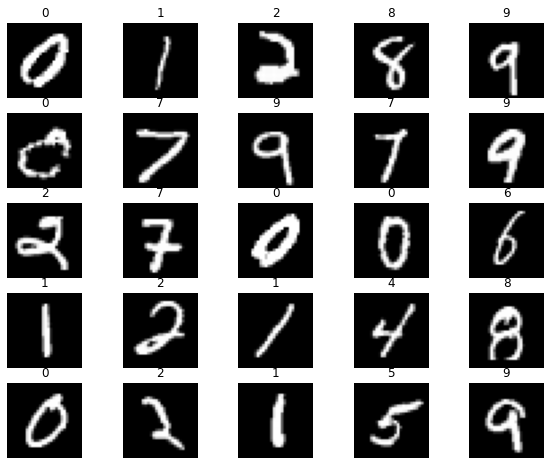

In [44]:
figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_data), size=(1,)).item()
    img, label = train_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()


Add a Dataloader from PyTorch which provides the network with mini batches rather than single training samples. These batches are reshuffled for every epoch.

In [45]:
from torch.utils.data import DataLoader
loaders = {
    'train' : torch.utils.data.DataLoader(train_data, 
                                          batch_size=100, 
                                          shuffle=True, 
                                          num_workers=1),
    
    'test'  : torch.utils.data.DataLoader(test_data, 
                                          batch_size=100, 
                                          shuffle=True, 
                                          num_workers=1),
}
loaders


{'train': <torch.utils.data.dataloader.DataLoader at 0x7f88a11bc040>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x7f88a11bc790>}

We will create out network using the torch.nn.Module. The neural network will have two fully convolutional layers with a relu activation function and MaxPooling.

Conv2d: Applies a 2D convolution over an input signal composed of several input planes.

Parameters:\
**in_channels (int)** — Number of channels in the input image\
**out_channels (int)** — Number of channels produced by the convolution\
**kernel_size (int or tuple)** — Size of the convolving kernel\
**stride (int or tuple, optional)** — Stride of the convolution. Default: 1\
**padding (int or tuple, optional)** — Zero-padding added to both sides of the input. Default: 0\
**padding_mode (string, optional)** — ‘zeros’, ‘reflect’, ‘replicate’ or ‘circular’. Default: ‘zeros’\
**dilation (int or tuple, optional)** — Spacing between kernel elements. Default: 1\
**groups (int, optional)** — Number of blocked connections from input channels to output channels. Default: 1\
**bias (bool, optional)** — If True, adds a learnable bias to the output. Default: True

In [46]:
import torch.nn as nn
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(         
            nn.Conv2d(
                in_channels=1,              
                out_channels=16,            
                kernel_size=5,              
                stride=1,                   
                padding=2,                  
            ),                              
            nn.ReLU(),                      
            nn.MaxPool2d(kernel_size=2),    
        )
        self.conv2 = nn.Sequential(         
            nn.Conv2d(16, 32, 5, 1, 2),     
            nn.ReLU(),                      
            nn.MaxPool2d(2),                
        )
        # fully connected layer, output 10 classes
        self.out = nn.Linear(32 * 7 * 7, 10)
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        # flatten the output of conv2 to (batch_size, 32 * 7 * 7)
        x = x.view(x.size(0), -1)       
        output = self.out(x)
        return output, x    # return x for visualization

**in_channels=1:** because our input is a grayscale image.

**Stride:** is the number of pixels to pass at a time when sliding the convolutional kernel.

**Padding:** to preserve exactly the size of the input image, it is useful to add a zero padding on the border of the image.

**kernel_size:** we need to define a kernel which is a small matrix of size 5 * 5. To perform the convolution operation, we just need to slide the kernel along the image horizontally and vertically and do the dot product of the kernel and the small portion of the image.

The **forward()** pass defines the way we compute our output using the given layers and functions.

In [48]:
cnn = CNN()
print(cnn)

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)


### Define a loss function 

In [49]:
loss_func = nn.CrossEntropyLoss()   
loss_func

CrossEntropyLoss()

### Define an optimization function
$lr$ defines the learning rate for the backpropagation

In [50]:
from torch import optim
optimizer = optim.Adam(cnn.parameters(), lr = 0.01)   
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.01
    maximize: False
    weight_decay: 0
)

### Training the model

Create a function called train() and pass num of epochs, model and data loaders as input parameters.

**num_epochs:** Number of times our model will go through the entire training dataset

In [55]:
from torch.autograd import Variable
num_epochs = 10

def train(num_epochs, cnn, loaders):
    
    cnn.train()
        
    # Train the model
    total_step = len(loaders['train'])
        
    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(loaders['train']):
            
            # gives batch data, normalize x when iterate train_loader
            b_x = Variable(images)   # batch x
            b_y = Variable(labels)   # batch y
            output = cnn(b_x)[0]               
            loss = loss_func(output, b_y)
            
            # clear gradients for this training step   
            optimizer.zero_grad()           
            
            # backpropagation, compute gradients 
            loss.backward()    
            # apply gradients             
            optimizer.step()                
            
            if (i+1) % 100 == 0:
                print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                       .format(epoch + 1, num_epochs, i + 1, total_step, loss.item()))
                pass
        
        pass
    
    
    pass
train(num_epochs, cnn, loaders)
print("Finished training")

Epoch [1/10], Step [100/600], Loss: 0.2739
Epoch [1/10], Step [200/600], Loss: 0.0519
Epoch [1/10], Step [300/600], Loss: 0.0742
Epoch [1/10], Step [400/600], Loss: 0.1569
Epoch [1/10], Step [500/600], Loss: 0.0928
Epoch [1/10], Step [600/600], Loss: 0.0862
Epoch [2/10], Step [100/600], Loss: 0.0319
Epoch [2/10], Step [200/600], Loss: 0.1884
Epoch [2/10], Step [300/600], Loss: 0.0391
Epoch [2/10], Step [400/600], Loss: 0.0833
Epoch [2/10], Step [500/600], Loss: 0.0188
Epoch [2/10], Step [600/600], Loss: 0.0450
Epoch [3/10], Step [100/600], Loss: 0.0292
Epoch [3/10], Step [200/600], Loss: 0.0296
Epoch [3/10], Step [300/600], Loss: 0.0063
Epoch [3/10], Step [400/600], Loss: 0.1224
Epoch [3/10], Step [500/600], Loss: 0.1052
Epoch [3/10], Step [600/600], Loss: 0.0053
Epoch [4/10], Step [100/600], Loss: 0.0548
Epoch [4/10], Step [200/600], Loss: 0.0274
Epoch [4/10], Step [300/600], Loss: 0.0425
Epoch [4/10], Step [400/600], Loss: 0.0089
Epoch [4/10], Step [500/600], Loss: 0.0291
Epoch [4/10

## Evaluate the model

We must call model.eval() to set dropout and batch normalization layers to evaluation mode before running inference.

model.train() tells your model that you are training the model. So effectively layers like dropout, batchnorm etc. which behave different on the train and test procedures know what is going on and hence can behave accordingly.

You can call either model.eval() or model.train(mode=False) to tell that you are testing the model.

In [57]:
def test():
    # Test the model
    cnn.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in loaders['test']:
            test_output, last_layer = cnn(images)
            pred_y = torch.max(test_output, 1)[1].data.squeeze()
            accuracy = (pred_y == labels).sum().item() / float(labels.size(0))
            pass
    print('Test Accuracy of the model on the 10000 test images: %.2f' % accuracy)
    
    pass
test()

Test Accuracy of the model on the 10000 test images: 0.97


In [62]:
sample = next(iter(loaders['test']))
imgs, lbls = sample

In [63]:
actual_number = lbls[:10].numpy()
actual_number

array([9, 8, 7, 1, 0, 9, 6, 0, 3, 8])

In [64]:
test_output, last_layer = cnn(imgs[:10])
pred_y = torch.max(test_output, 1)[1].data.numpy().squeeze()
print(f'Prediction number: {pred_y}')
print(f'Actual number: {actual_number}')

Prediction number: [9 8 7 1 0 9 6 0 3 8]
Actual number: [9 8 7 1 0 9 6 0 3 8]


In [4]:
# TODO: Write Neural Network for MNIST dataset (once manually, one with PyTorch)
#Before I write a Neural Network, write an Autoencoder
#Also have a brief seection on Bayesian learning